In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(20, 10), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.3.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
cffi                1.15.1
cloudpickle         2.0.0
colorama            0.4.6
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2020.12.0
dateutil            2.8.2
decorator           5.1.1
defusedxml          0.7.1
entrypoints         0.4
h5py                3.7.0
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.6.5
jedi                0.14.1
joblib              1.1.1
jupyter_server      1.23.4
kiwisolver          1.4.4
llvmlite            0.39.1
matplotlib          3.4.2
mkl                 2.4.0
mpl_toolkits        NA
natsort             8.2.0
nbinom_ufunc        NA
numba               0.56.4
numexpr             2.8.4
numpy               1.21.5
packaging           22.0
pandas              1.3.5
parso               0.5.2
pexpect             4.

In [3]:
adata = sc.read_h5ad("MouseRGC_integrated_v2.h5ad")
adata

AnnData object with n_obs × n_vars = 35697 × 31053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.file', 'animal', 'seurat_clusters', 'dendro_order', 'integrated_snn_res.0.8', 'barcode', 'annotated'
    var: '_index', 'features'

In [4]:
adata.var.index = adata.var['_index']
adata.var.index

Index(['XKR4', 'GM37381', 'RP1', 'SOX17', 'GM37323', 'MRPL15', 'RGS20',
       'NPBWR1', '4732440D04RIK', 'GM26901',
       ...
       'GM28406', 'GM29436', 'GM28407', 'GM29393', 'GM21294', 'GM28672',
       'GM28670', 'GM29504', 'GM20837', 'GM47283'],
      dtype='object', name='_index', length=31053)

In [5]:
adata

AnnData object with n_obs × n_vars = 35697 × 31053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'orig.file', 'animal', 'seurat_clusters', 'dendro_order', 'integrated_snn_res.0.8', 'barcode', 'annotated'
    var: '_index', 'features'

In [6]:
df = pd.DataFrame.sparse.from_spmatrix(adata.X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,31043,31044,31045,31046,31047,31048,31049,31050,31051,31052
0,1.612110,0.0,0.0,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
1,1.146473,0.0,0.0,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,1.334265,0.0,0.0,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1.197003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,1.889654,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141


In [7]:
df.columns = adata.var.index
df.index = adata.obs.annotated
df.head()

_index,XKR4,GM37381,RP1,SOX17,GM37323,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,...,GM28406,GM29436,GM28407,GM29393,GM21294,GM28672,GM28670,GM29504,GM20837,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
25,1.612110,0.0,0.0,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
3,1.146473,0.0,0.0,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,1.334265,0.0,0.0,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,1.197003,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,1.889654,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141


In [8]:
df.to_pickle('rgc_df.pkl')

In [9]:
df = pd.read_pickle('rgc_df.pkl')
df = df.T

In [10]:
df

annotated,25,3,28,28,14,11,28,23,7,17,...,1,0,2,2,19,9,2,15,13,3
_index,,,,,,,,,,,,,,,,,,,,,
XKR4,1.612110,1.146473,1.334265,1.197003,1.889654,2.710804,1.698442,1.104783,1.514085,0.945292,...,2.014922,0.0,1.209607,1.80575,1.134242,1.090492,0.0,1.910007,2.206981,2.119660
GM37381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
RP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
SOX17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
GM37323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GM28672,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
GM28670,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
GM29504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Text(0, 0.5, 'log(CV)')

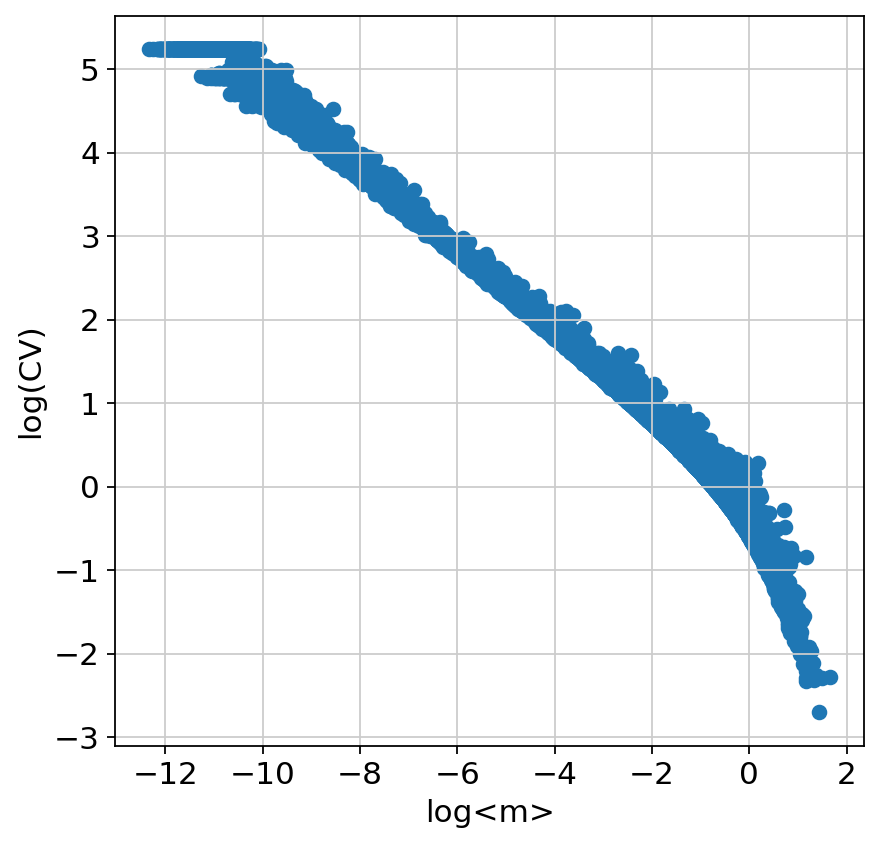

In [11]:
df = df[df.sum(axis = 1) != 0]
gene_log_mean = np.log(df.mean(axis = 1))
gene_log_cv = np.log(df.std(axis = 1)/df.mean(axis = 1))
plt.figure(figsize=(6,6))
plt.scatter(gene_log_mean, gene_log_cv)
plt.xlabel('log<m>')
plt.ylabel('log(CV)')

Text(0, 0.5, 'log(CV)')

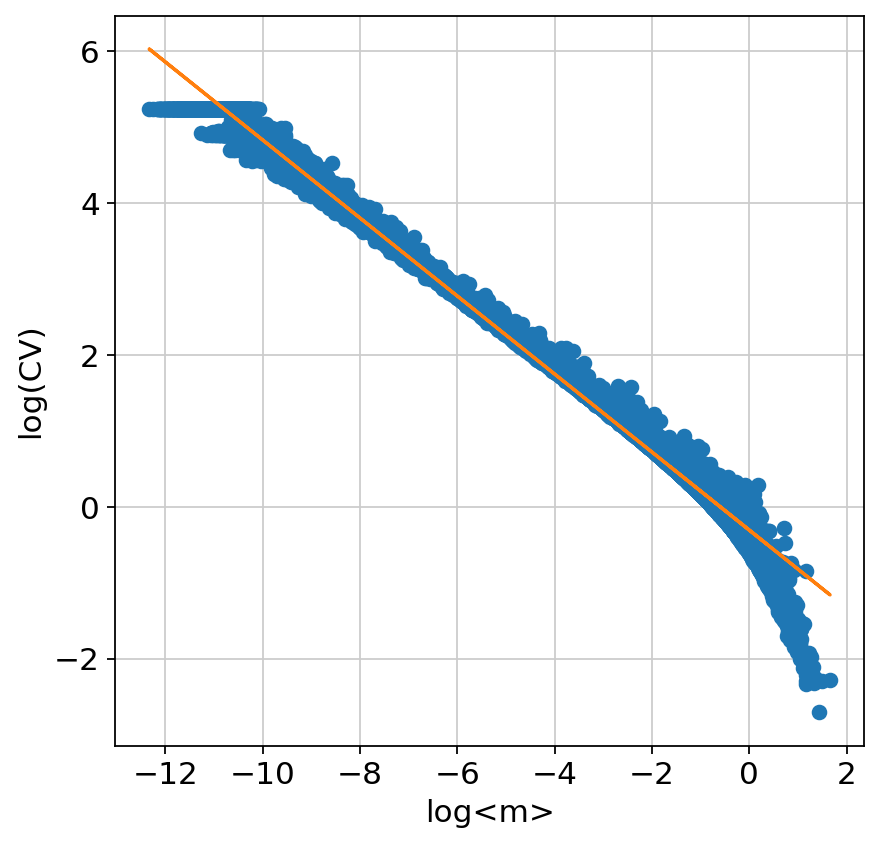

In [12]:
slope, intercept, r_val , p_val, std_err = stats.linregress(gene_log_mean, gene_log_cv)
plt.figure(figsize=(6,6))
plt.plot(gene_log_mean, gene_log_cv, 'o', gene_log_mean, slope*gene_log_mean + intercept)
plt.xlabel('log<m>')
plt.ylabel('log(CV)')

In [13]:
gene_selected_logcv = gene_log_cv[gene_log_cv > (slope * gene_log_mean + intercept)]
selected_gene_idx = gene_selected_logcv.index
print (selected_gene_idx)

Index(['GM37381', 'RP1', 'MRPL15', 'RGS20', 'NPBWR1', '4732440D04RIK',
       'GM26901', 'MYBL1', 'VCPIP1', 'SNHG6',
       ...
       'GM28510', 'GM20831', 'GM20792', 'GM21209', 'GM29082', 'GM29564',
       'GM21760', 'GM21409', 'GM20820', 'GM47283'],
      dtype='object', name='_index', length=17144)


In [14]:
df = df.T[selected_gene_idx]
df

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
25,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
3,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.571013,0.571013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.589141,0.957386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,0.333000,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
15,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [15]:
df.to_pickle('rgc_df_gene_selected.pkl')